In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

In [104]:
df = pd.read_csv('longer/longer_ss200_0.csv')

In [105]:
df

,Unnamed: 0,time,left_pwm,right_pwm,left_pressure,right_pressure,left_flex,right_flex,base_pos_x,base_pos_y,tip_pos_x,tip_pos_y
0,0,0.000000,0.0,0.0,101.0,0.0,603.0,0.0,112.969608,-35.971571,112.213581,48.617317
1,1,0.029785,0.0,0.0,102.0,0.0,603.0,0.0,112.986755,-35.978025,112.195227,48.581944
2,2,0.049805,0.0,0.0,100.0,0.0,605.0,0.0,112.986755,-35.978025,112.195227,48.581944
3,3,0.080078,0.0,0.0,101.0,0.0,604.0,0.0,112.996028,-35.988926,112.195227,48.581944
4,4,0.109863,0.0,0.0,101.0,0.0,606.0,0.0,113.005755,-35.999177,112.148169,48.549279
...,...,...,...,...,...,...,...,...,...,...,...,...
1557,1557,41.969727,0.0,0.0,101.0,0.0,607.0,0.0,113.087294,-35.751850,112.346403,48.760791
1558,1558,41.989746,0.0,0.0,100.0,0.0,608.0,0.0,113.075699,-35.750975,112.338676,48.746707
1559,1559,42.020020,0.0,0.0,101.0,0.0,606.0,0.0,113.075699,-35.750975,112.338676,48.746707
1560,1560,42.040039,0.0,0.0,101.0,0.0,606.0,0.0,113.097725,-35.740905,112.321224,48.729253


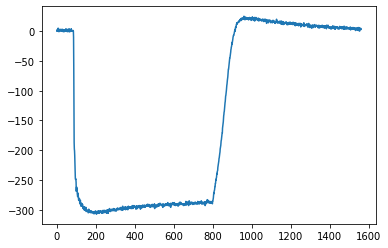

In [106]:
plt.plot(df['left_flex'] - df.loc[0, 'left_flex'])

In [174]:
def remove_drift(arr, thresh=20):
    def reduce(arr):
        if len(arr) > 50 :
            return np.median(arr[:-50])
        return np.median(arr)
    prev = 0
    x_hat_s = []
    y_s_0 = arr[0]
    for i in range(len(arr)):
        if abs(arr[i] - y_s_0) > thresh:
            x_hat_s.extend([reduce(list(df['left_flex'][prev:i]))]*(i - prev))
            y_s_0 = arr[i]
            prev = i
    x_hat_s.extend([np.median(df['left_flex'][prev:i])]*(i - prev))
    #x_hat_s = medfilt(x_hat_s, kernel_size=51)
    return x_hat_s

In [175]:
cleaned = remove_drift(df['left_flex'])

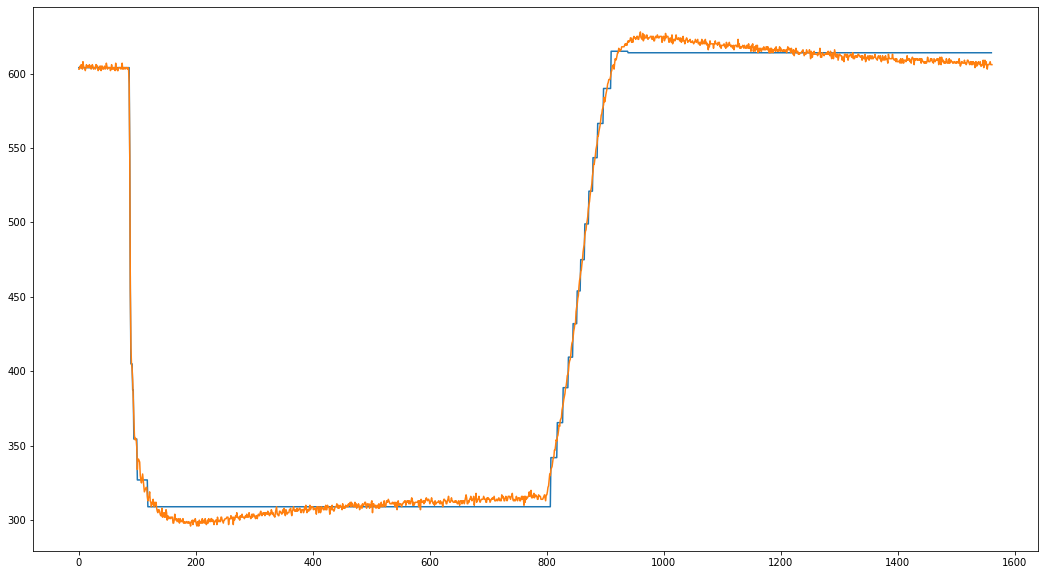

In [176]:
plt.figure(figsize=(18,10))
plt.plot(cleaned)
plt.plot(df['left_flex'])